In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd

In [2]:
consumerKey = 'SV8XXXXXXXXXXXXXXXX'
consumerSecret = 'gu7fZXXXXXXXXXXXXXXXX'
accessToken = '10742XXXXXXXXXXXXXXXX'
accessTokenSecret = 'NpszXXXXXXXXXXXXXXXX'


In [3]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
searchTweet = input("Enter something")
NoOfTweets = int(input("Enter number of tweets"))

Enter something davido
Enter number of tweets 200


In [19]:

tweets = tweepy.Cursor(api.search, q=searchTweet).items(NoOfTweets)
data=[]

In [3]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import re
from nltk.corpus import stopwords

In [21]:

bucket = []
cleans = []
for tweet in tweets:
    if tweet.lang == 'en':
        t_tweet = tweet.text
        clean_text = ' '.join(re.sub("(@[A-Za-z0-9_]+)|(http[:/.A-Za-z0-9]+)|(RT)|(#[A-Za-z0-9_]+)|(\W)", " ", t_tweet).split())
        token = sent_tokenize(clean_text)
        root_text = [lemma.lemmatize(text) for text in token if text not in stopwords.words('english')]
#         print(str(root_text))
        bucket.append(root_text)

# print(bucket)

In [22]:
from textblob import TextBlob
data = []
for text in bucket:
    for each_word in text:
        analysis = TextBlob(each_word)
        if analysis.sentiment.polarity < 0:
            polarity = 'Negative'
            
        else:
            polarity = 'Positive'
            
        save = {}
        save['Sentiment'] = polarity
        save['Tweet'] = each_word
        data.append(save)



In [ ]:
df = pd.DataFrame(data)
df.to_csv('davido.csv', index=False)

In [25]:
data = pd.read_csv('davido.csv')
data.head(10)

,Sentiment,Tweet
0,Positive,This is one of my side hustle I grind when I m...
1,Positive,We rise by lifting others up Davido 2019 This ...
2,Positive,amp Boo d Up
3,Positive,Bless me davido
4,Positive,This is one of my side hustle I grind when I m...
5,Positive,respect baba any thing for ur boy ooo Oya
6,Positive,This is one of my side hustle I grind when I m...
7,Negative,Ohhh lord why am i always late
8,Positive,Abeg Davido make meseff chop from your money a...
9,Positive,gimme one infinix now even the one that has fa...


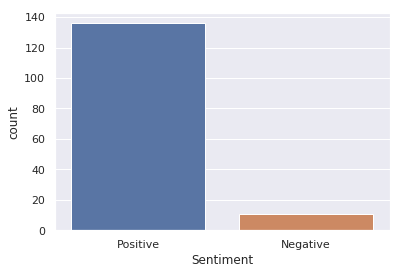

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
sns.countplot(x = data['Sentiment'])
plt.savefig('plot.jpg')
plt.show()


In [27]:
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [62]:
tweets = data.Tweet.tolist()
tweets_ =  ' '.join([token for token in tweets]).split()
# tweets_

In [63]:
freq_distribution = FreqDist(tweets_)
freq_distribution

FreqDist({'I': 108, 'to': 61, 'for': 61, 'my': 42, 'the': 41, 'one': 36, 'of': 35, 'is': 34, 'money': 32, 'make': 31, ...})

In [70]:
large_word = dict((key, value) for key, value in freq_distribution.items() if len(key) > 4)
# large_word

In [68]:
freq_dist = FreqDist(large_word)

In [69]:
w_cloud = WordCloud().generate_from_frequencies(freq_dist)

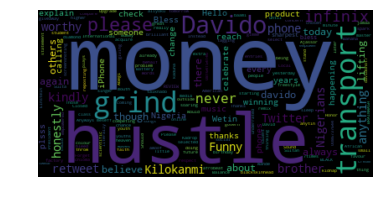

In [71]:
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.jpg')
plt.show()